# <span style="color:rgb(255, 0, 255)">This document contains all the steps of data analysis for the regression model</span> 

### <span style="color:rgb(255, 0, 255)">--- Import the necessary libraries</span>

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import matplotlib.ticker as mk
pd.set_option('display.max_columns', None)

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline


import os #we will use the function listdir to list files in a folder
import math #to apply absolute value

### <span style="color:rgb(255, 0, 255)">--- Load the database</span>

In [5]:
df = pd.read_csv('for_data_viz.csv')
df.head()

date  bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  \
0  2014-10-13         3       1.00         1180      5650     1.0           0   
1  2014-12-09         3       2.25         2570      7242     2.0           0   
2  2015-02-25         2       1.00          770     10000     1.0           0   
3  2014-12-09         4       3.00         1960      5000     1.0           0   
4  2015-02-18         3       2.00         1680      8080     1.0           0   

   view  condition  grade  sqft_above  sqft_basement  yr_built  yr_renovated  \
0     0          3      7        1180              0      1955             0   
1     0          3      7        2170            400      1951          1991   
2     0          3      6         770              0      1933             0   
3     0          5      7        1050            910      1965             0   
4     0          3      8        1680              0      1987             0   

   zipcode      lat     long  sqft_living15  sqft_lot15   price  
0    98178  47.5112 -122.257           1340        5650  221900  
1    98125  47.7210 -122.319           1690        7639  538000  
2    98028  47.7379 -122.233           2720        8062  180000  
3    98136  47.5208 -122.393           1360        5000  604000  
4    98074  47.6168 -122.045           1800        7503  510000

### <span style="color:rgb(255, 0, 255)">--- Visualize values

</span>

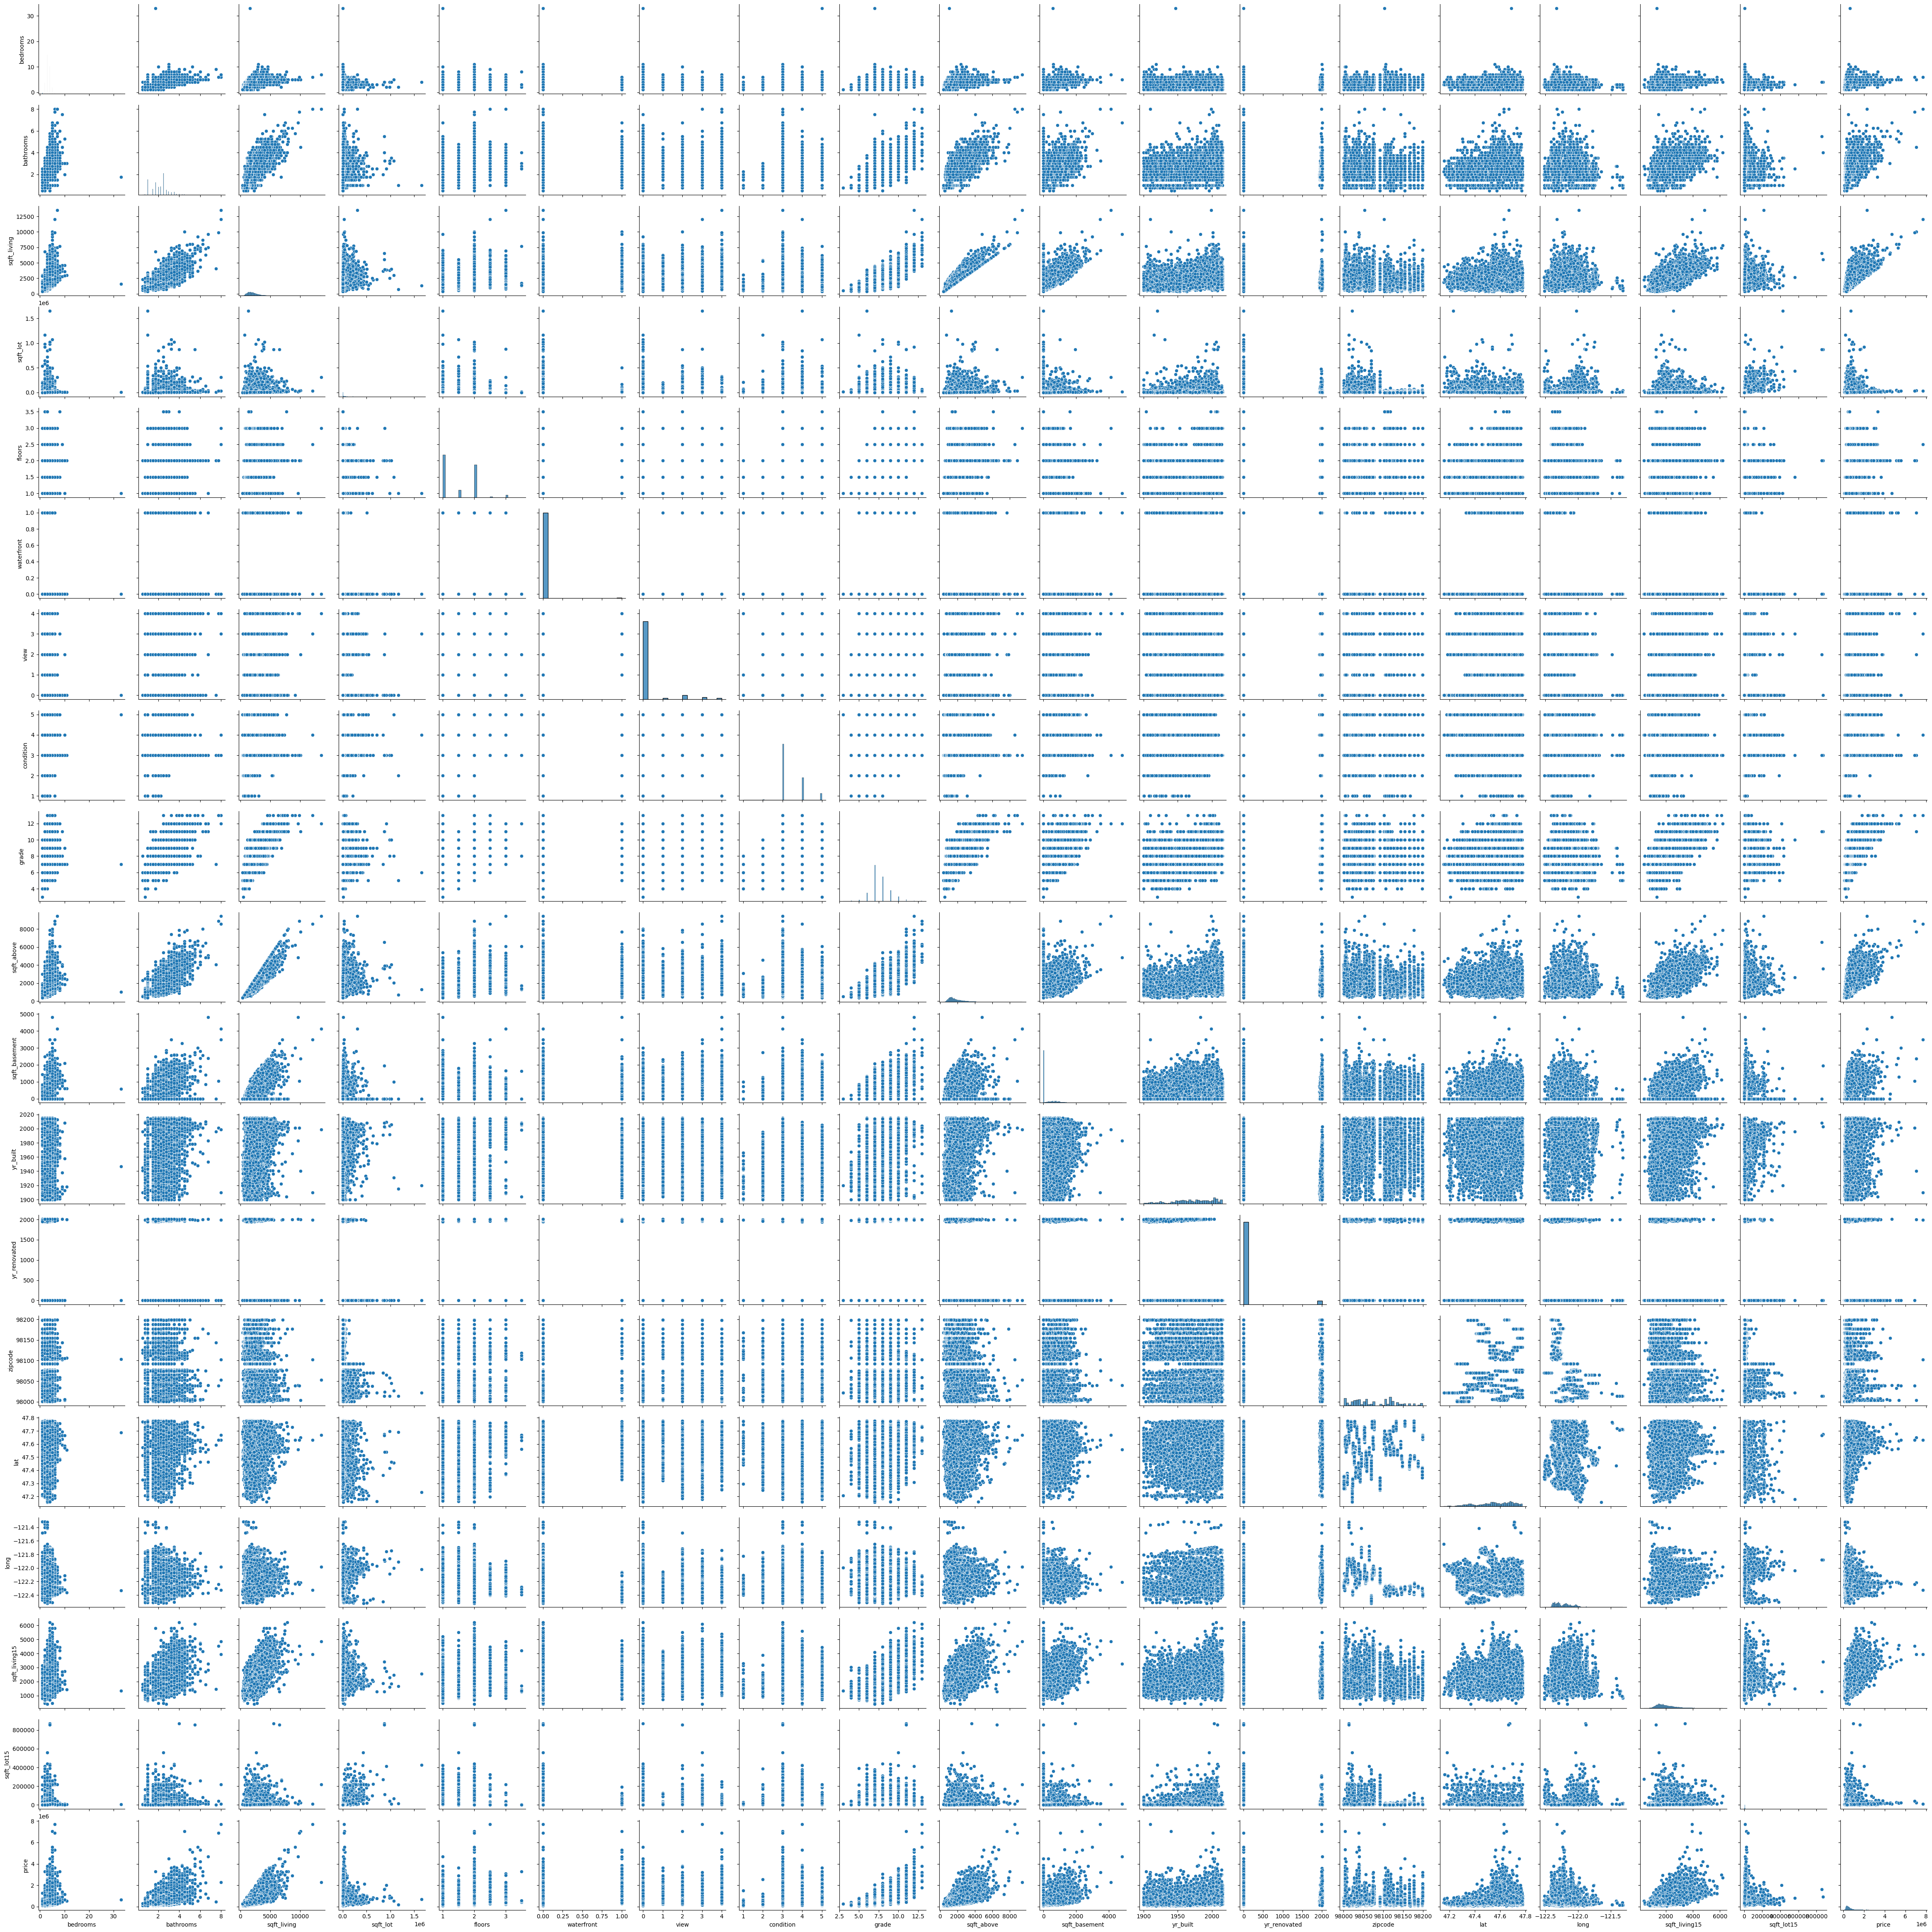

In [6]:
# Let's see how every numerical numbers correlate with others. 
sns.pairplot(df)

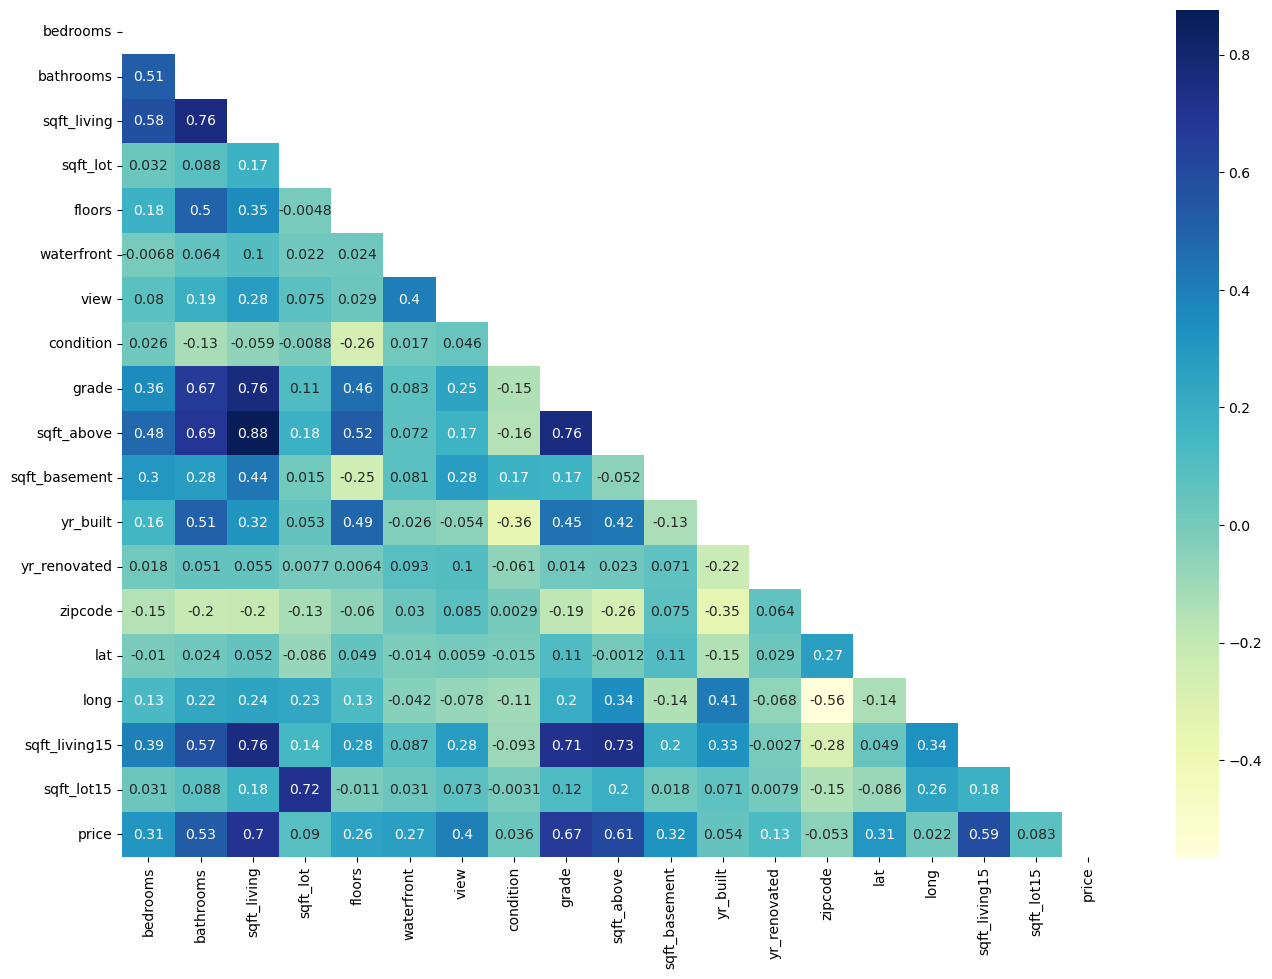

In [7]:
#Let's do a heatmap
corr = df.corr()

mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True # optional, to hide repeat half of the matrix

plt.figure(figsize=(16, 11))
sns.heatmap(corr, annot=True, cmap="YlGnBu", mask=mask)

plt.show()

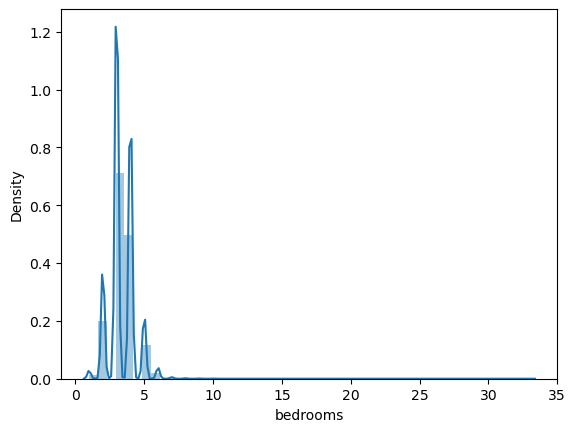

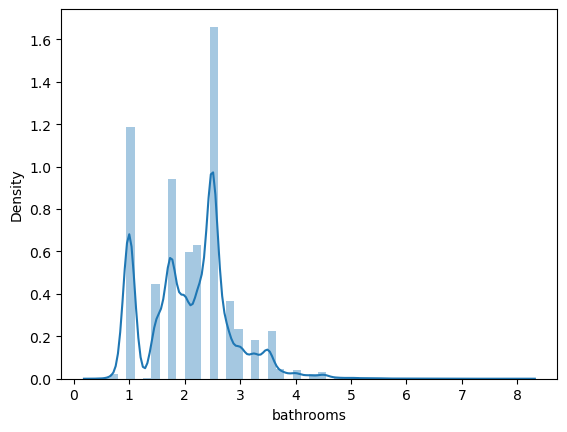

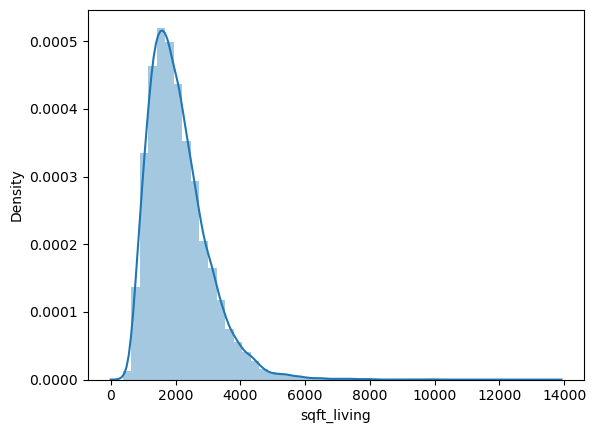

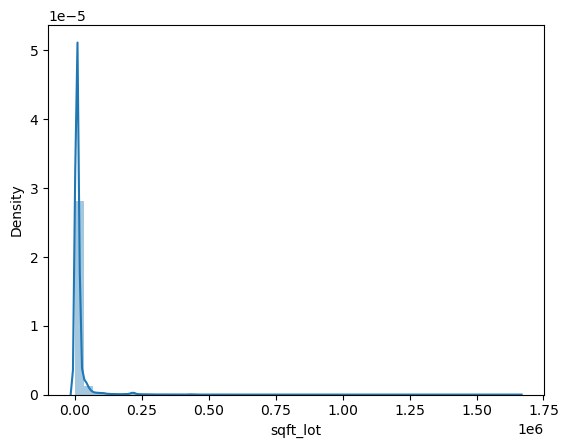

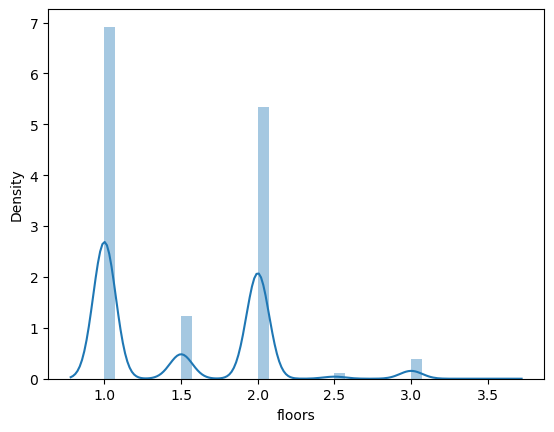

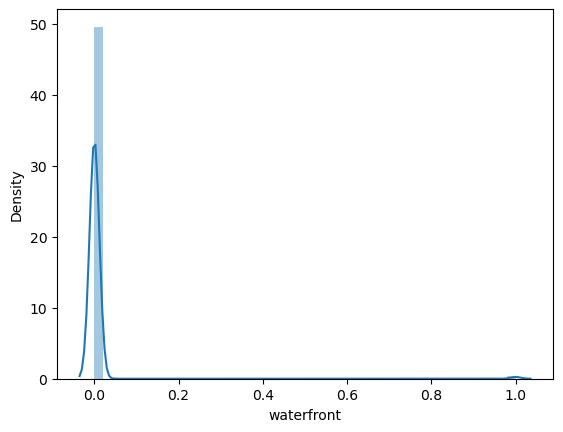

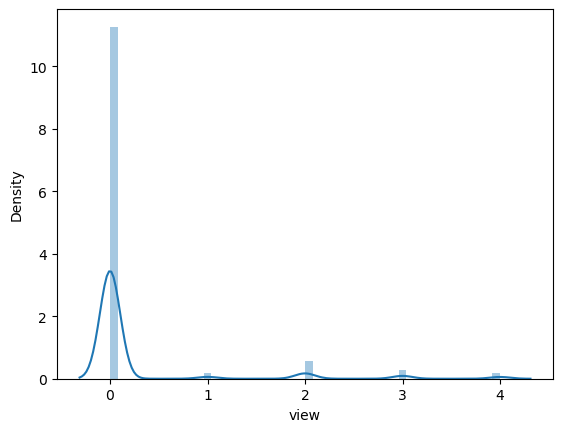

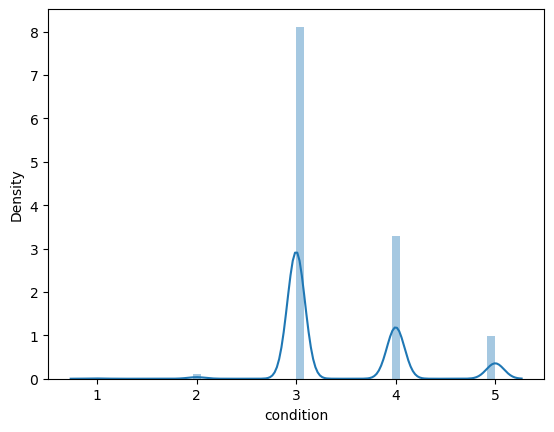

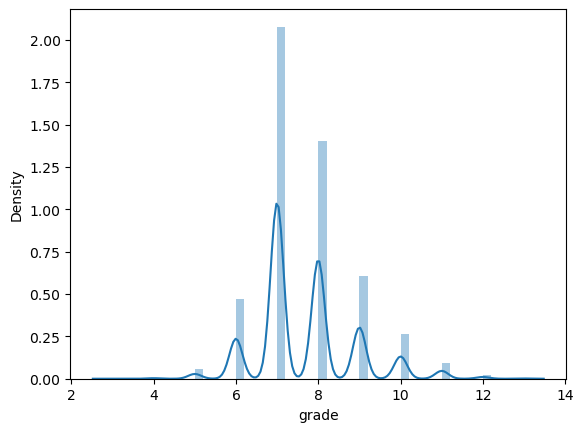

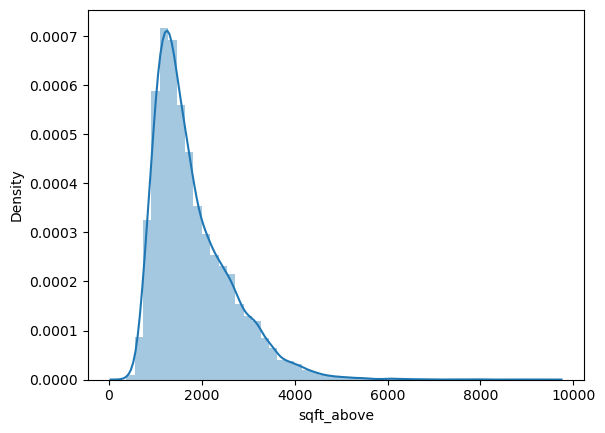

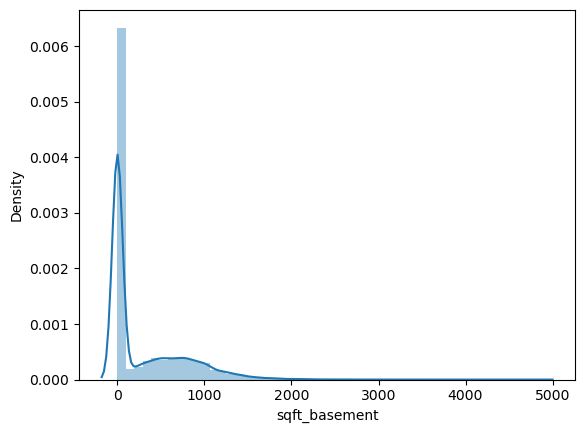

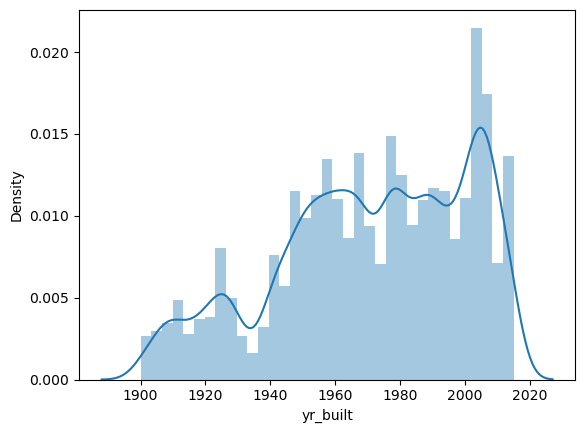

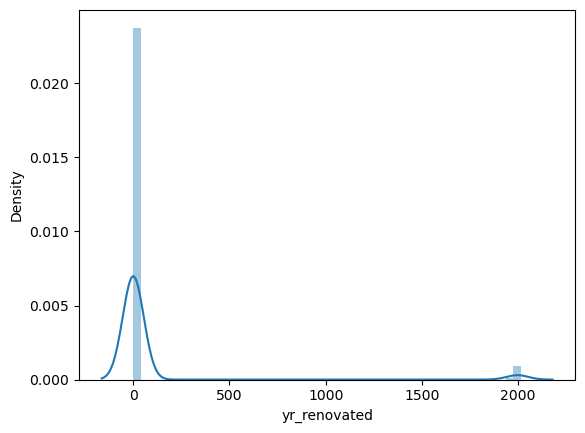

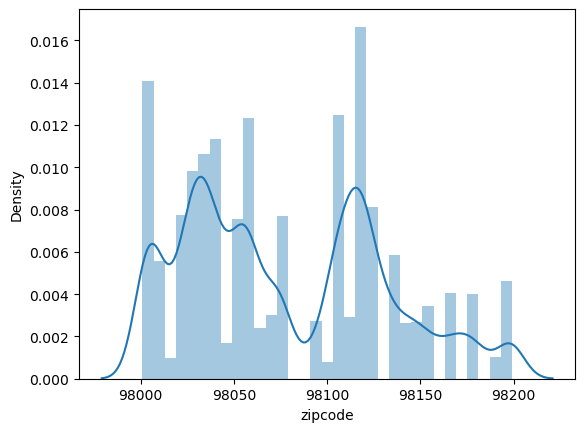

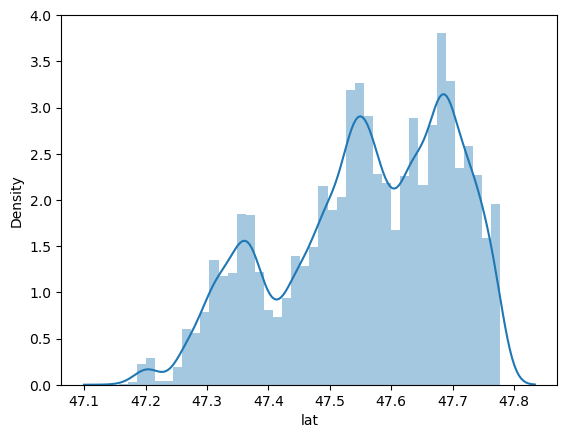

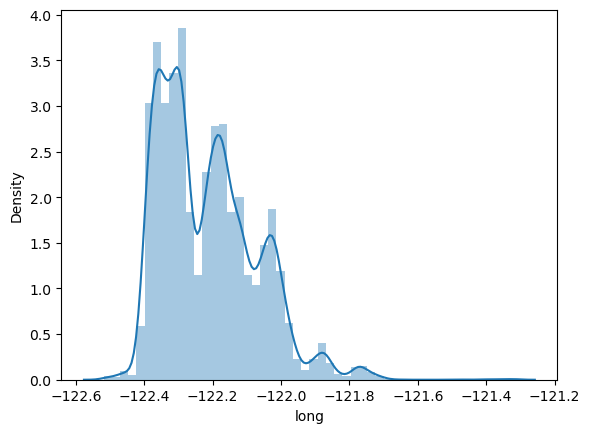

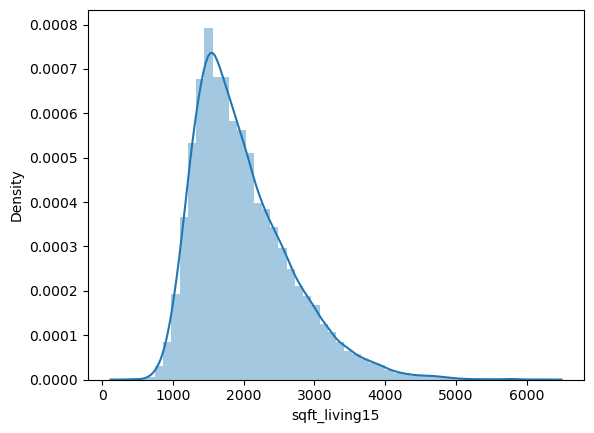

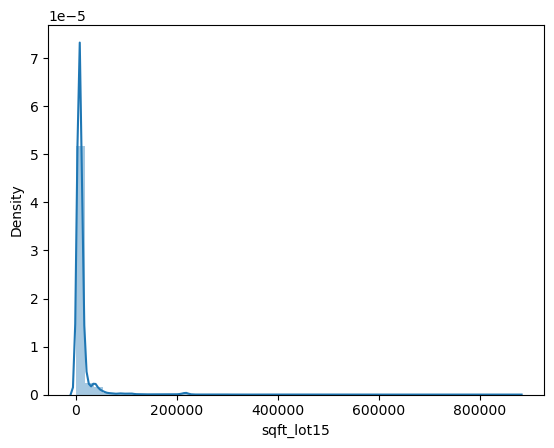

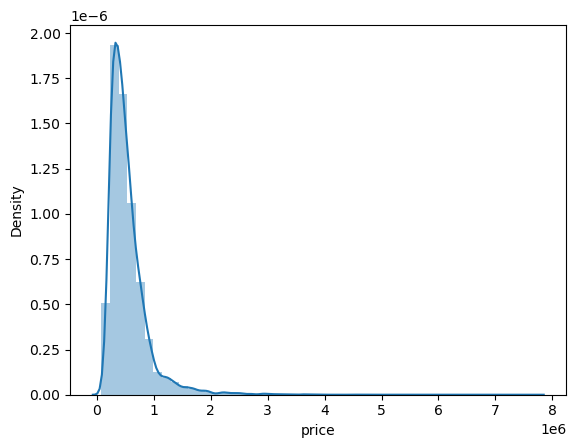

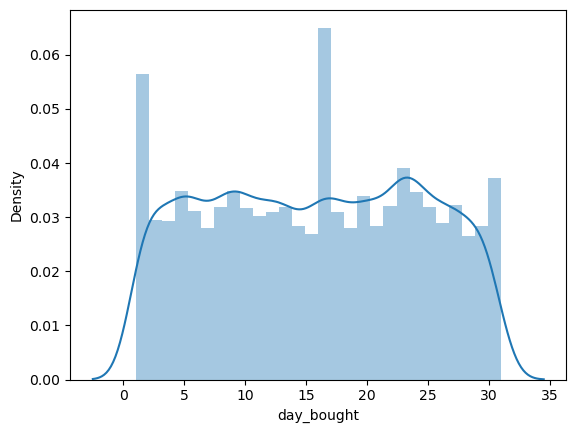

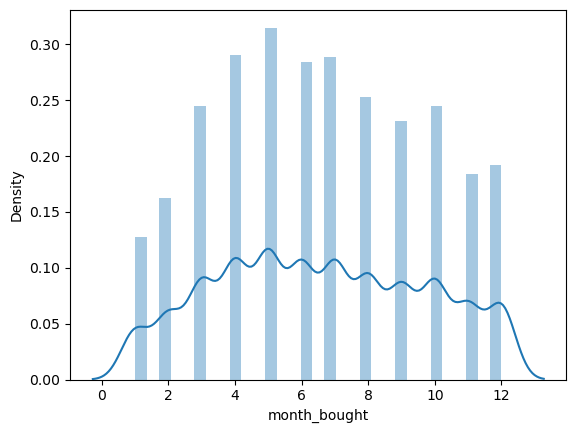

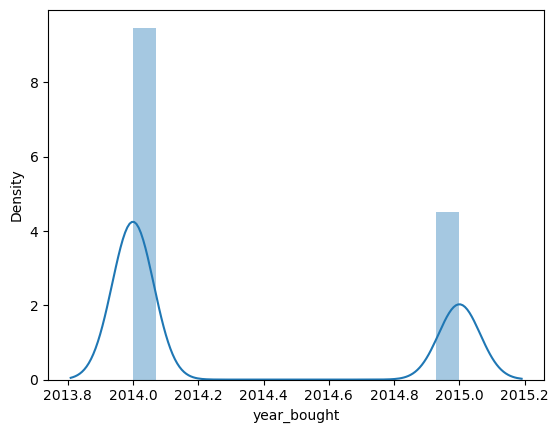

In [17]:
for column in df:
    sns.distplot(df[column])
    plt.show() 

<span style="color:rgb(255, 0, 255)"> Inside continous vlaues, we see that sqft_living, sqft_above, sqft_living15 are really skewed, we should in next steps apply log transformation to see if that affects the model

<BarContainer object of 12 artists>

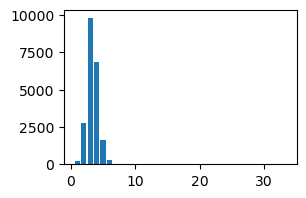

In [21]:
# Let's dive a little bit in the distribution of the columns of dicrete and continous selections

#discrete: bedrooms, bathrooms, floors, waterfront, view, condition, grade

distribution = df['bedrooms'].value_counts()
plt.figure(figsize=(3, 2))
plt.bar(distribution.index, distribution.values)

<BarContainer object of 29 artists>

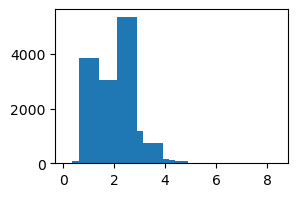

In [22]:
distribution = df['bathrooms'].value_counts()
plt.figure(figsize=(3, 2))
plt.bar(distribution.index, distribution.values)

<BarContainer object of 6 artists>

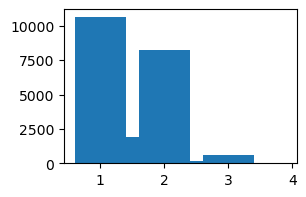

In [23]:
distribution = df['floors'].value_counts()
plt.figure(figsize=(3, 2))
plt.bar(distribution.index, distribution.values)

<BarContainer object of 2 artists>

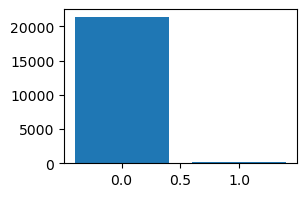

In [24]:
distribution = df['waterfront'].value_counts()
plt.figure(figsize=(3, 2))
plt.bar(distribution.index, distribution.values)

<BarContainer object of 5 artists>

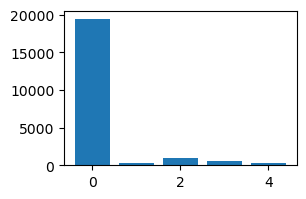

In [25]:
distribution = df['view'].value_counts()
plt.figure(figsize=(3, 2))
plt.bar(distribution.index, distribution.values)

<BarContainer object of 5 artists>

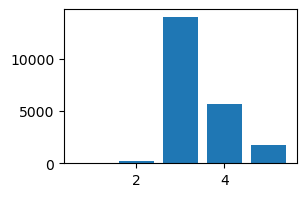

In [26]:
distribution = df['condition'].value_counts()
plt.figure(figsize=(3, 2))
plt.bar(distribution.index, distribution.values)

<BarContainer object of 11 artists>

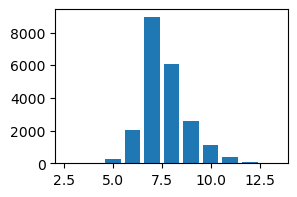

In [27]:
distribution = df['grade'].value_counts()
plt.figure(figsize=(3, 2))
plt.bar(distribution.index, distribution.values)

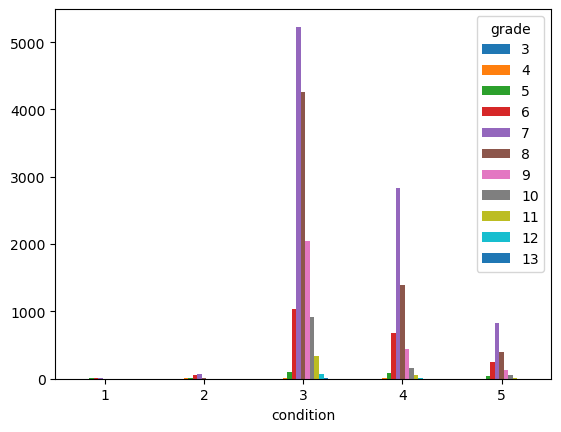

In [28]:
# We want also to see how grade and condition are related:
crosstab = pd.crosstab(df.condition, df.grade)
barplot = crosstab.plot.bar(rot=0)